# **Image Transformations**

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Image transformations can be categorized into two distinct types: image filtering and image warping. **Image filtering** involves altering the brightness value of the pixels within an image, while leaving their coordinates untouched. In contrast, **Image warping** entails modiying the coordinates of the pixels, without changing their respective brightness values.

Similar to image filtering, image warping is acheived by multiplying a window of pixels by some matrix $T$, which is called the **Transformation Matrix**. We'll begin our discussion through $2 \times 2$ Linear Transformations where the transformation matrix is of dimensions $2 \times 2$.

## **2 x 2 Linear Image Transformations**

In image warping, the transformation matrix $T$ is used to modify the coordinates of the pixels within the window, rather than their intensity (brightness) values. The transformed pixel coordinates are computed by multiplying the original pixel coordinates $(x, \space y)$ with the transformation matrix $T$.

Let $p_1 = (x, \space y)$ represent a point on the original image, and let $p_2 = (x', \space y')$ represent its warped version after applying a transformation matrix $T$. The relationship between them is given by:

$$
p_1 = \begin{bmatrix} x \\ y \end{bmatrix}, \quad p_2 = \begin{bmatrix} x' \\ y' \end{bmatrix}
$$

$$
p_2 = Tp_1
$$

$$
\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}
$$

$$
x' = a \cdot x + b \cdot y, \quad y' = c \cdot x_1 + d \cdot y_1
$$

By modifying the values of $a$, $b$, $c$, and $d$, we can achieve different image transformations such as scaling, rotation, and skewing (shearing).

The transformation matrices for each of the aforementioned transformations are given below:

**Scaling Matrix**

$$
T_{scale} = \begin{bmatrix}
    s_x & 0 \\
    0 & s_y
\end{bmatrix}
$$

where $s_x$ and $s_y$ represent the scaling factors along the horizontal axis and vertical axis, respectively. 

**Rotation Matrix**

$$
T_{rotate} = \begin{bmatrix}
    cos(\theta) & -sin(\theta) \\
    sin(\theta) & cos(\theta)
\end{bmatrix}
$$

where $\theta$ represents the degree of rotation about the point (0, 0).

**Skewing Matrix**

$$
T_{skew \space horizontal} = \begin{bmatrix}
    1 & \alpha \\
    0 & 1
\end{bmatrix}
$$

$$
T_{skew \space vertical} = \begin{bmatrix}
    1 & 0 \\
    \beta & 1
\end{bmatrix}
$$

where $\alpha$ and $\beta$ represent the skewing factor along the horizontal and vertical axis, respectively.

**Shearing Matrix**

$$
T_{shear} = \begin{bmatrix}
    1 & \alpha \\
    \beta & 1
\end{bmatrix}
$$

where $\alpha$ and $\beta$ represent the shearing factor along the horizontal and vertical axis, respectively.

> For each case, I encourage you to multiply the transformation matrix $T$ with $p_1$ to see how the new points $(x', y')$ relate to the original points $(x, y)$.

**Properties of Linear Transformations**

Any transformation of the form: 

$$
\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}
$$

is termed a **linear transformation** and satisfies the following properties:

- Origin maps to the origin.
- Parallel lines remain parallel.
- Closed under composition.

**Closed under composition** refers to the fact that multiplying an image by, say, a scaling matrix followed by a rotation matrix is the same thing as multiplying those two matrices and then applying it to the image. This feature is beneficial when applying multiple transformations simultaneously to an image.

$$
p_2 = T_{21} \cdot p_1
$$

$$
p_3 = T_{32} \cdot p_2
$$

Then,

$$
p_3 = T_{31} \cdot p_1
$$

Where

$$
T_{31} = T_{32} \times T_{21}
$$


When you multiply different transformation matrices, the result is usually called the **homography matrix**.

## **2 x 3 Linear Image Transformations**

$2 \times 3$ image transformations are achieved a transformation matrix $T$ of size $2 \times 3$. The reason for such a transformation is to acheive translation, which is not possible with the previously described $2 \times 2$ transformation matrices.

$$
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} a & b & c \\ d & e & f \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

**Translation Matrix**

$$
T_{translate} = \begin{bmatrix}
    1 & 0 & t_x \\
    0 & 1 & t_y
\end{bmatrix}
$$

where $t_x$ and $t_y$ represent the amount of translation along the x and y axes, respectively.

As a matter of fact, each of the previously discussed transformations may be represented using a $2 \times 3$ transformation matrix as follows:

**Scaling Matrix**

$$
T_{scale} = \begin{bmatrix}
    s_x & 0 & 0 \\
    0 & s_y & 0
\end{bmatrix}
$$

**Rotation Matrix**

$$
T_{rotate} = \begin{bmatrix}
    cos(\theta) & -sin(\theta) & 0 \\
    sin(\theta) & cos(\theta) & 0
\end{bmatrix}
$$

**Skewing/Shearing Matrix**

$$
T_{skew} = \begin{bmatrix}
    1 & m_x & 0 \\
    m_y & 1 & 0
\end{bmatrix}
$$

## **3 x 3 Linear Image Transformations (Affine and Perspective Transformations)**

An **affine transformation** is any transformation of the form:

$$
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} a & b & c \\ d & e & f \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

Thus all the geometric transformations we discussed so far such as translation, rotation, scaling, etc are all affine transformations. In fact, an affine transformation can be though of as a composition of rotation, translation, scaling, and shear.

<span style="color: red; font-weight:bold">Any of the previously mentioned transformations can be represented using a $3 \times 3$ transformation matrix by simply appending a row of $[0 \space 0 \space 1]$.</span>

A **perspective transformation** is any transformation of the form:

$$
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} a & b & c \\ d & e & f \\ g & h & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

From the name, the perspective transformation is associated with a change in the viewpoint.

## **Implementation in OpenCV**

### **Example 1: Performing Affine Transformations on a Discrete Set of Points**

For the first example, we'll plot a square of points and apply affine transformations to it. We'll begin by defining a square of dimensions 2 situated at the origin. 

In [47]:
list_of_points = [
    [1, 1], # top-right
    [1, -1], # bottom-right
    [-1, -1], # bottom-left
    [-1, 1], # top-left
    [1, 1] # redundant point to complete the square. You can remove it to see what happens
] # Notice how we started at the top-right and proceeeded in a clock-wise fashion. You can start at any point but make sure to go either clock-wise or anticlock-wise.
# This is because the plot() function will connect the points sequentially. If you don't go in order, you won't get a square. 

original_pts = np.array(list_of_points)
original_pts # first column contains all the x-coordinates and the second column contains the cooresponding y-coordinates

array([[ 1,  1],
       [ 1, -1],
       [-1, -1],
       [-1,  1],
       [ 1,  1]])

Now, for reasons of convenience, it's better to list the x-coordinates along the first row and the y-coordinates along the second row. This will reduce the number of steps required later on when performing matrix multiplication. 

For this reason, we'll take the transpose:

In [48]:
original_pts = np.transpose(original_pts)
original_pts

array([[ 1,  1, -1, -1,  1],
       [ 1, -1, -1,  1,  1]])

The second task is to actually plot the sqaure. We'll make use of `plt.plot()` which is commonly used for creating 2D visualization. The basic syntax is as follows:

`plt.plot(x, y, format, **kwargs)`

- **x**: X-axis data (array-like or iterable).
- **y**: Y-axis data (array-like or iterable).
- **format**: A string specifying the format of the plot, indicating the color, marker, and line style. For example, 'b-' represents a blue solid line.
- **kwargs**: Additional keyword arguments that control various aspects of the plot, such as color, linestyle, marker, label, etc.

**Commonly Used Format Codes**
- 'b': blue
- 'g': green
- 'r': red
- 'c': cyan
- 'm': magenta
- 'y': yellow
- 'k': black
- 'w': white
- '-': solid line
- '--': dashed line
- '.': point marker
- 'o': circle marker
- '^': triangle marker
- 's': square marker

**Additional Keyword Arguments (kwargs)**
- color: Line color.
- linestyle: Line style ('-', '--', ':', etc.).
- linewidth: Line width.
- marker: Marker style.
- markersize: Marker size.
- label: Label for the plot, used for legend.

Additionally, you may use `plt.axis()` to control the scaling and apperance of the axes in a plot.

`plt.axis([xmin, xmax, ymin, ymax])`

- **xmin, xmax, ymin, ymax**: Optional parameters that specify the axis limits.
- **equal**: Maintain aspect ratio, meaning one unit on the x-axis is equal to one unit on the y-axis (Helpful to avoid distortions)

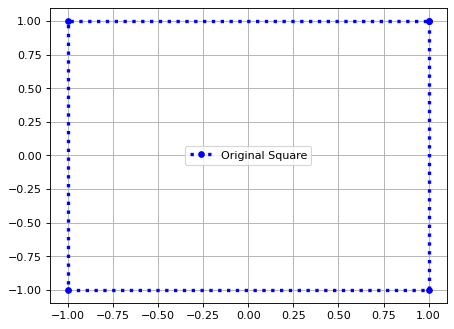

In [49]:
plt.plot(
    [
        original_pts[0, 0], # x-coordinate of first point
        original_pts[0, 1],
        original_pts[0, 2],
        original_pts[0, 3],
        original_pts[0, 4],
    ]
    , 
    [
        original_pts[1, 0], # y-coordinate of first point
        original_pts[1, 1],
        original_pts[1, 2],
        original_pts[1, 3],
        original_pts[1, 4]        
    ], 
    label='Original Square', color='blue', marker = '.', linestyle=':', markersize = '10', linewidth = '3') # You can play with these paramters

plt.legend() # show the labels
plt.grid(True); # show the grid

Alternatively, you may utilize the list syntax and format parameter as follows:

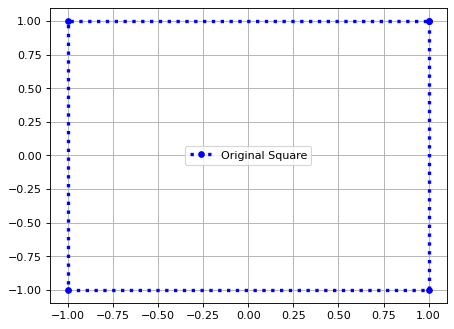

In [50]:
plt.plot(original_pts[0, :], original_pts[1, :], 'b.:', label='Original Square', markersize = '10', linewidth = '3')

# original_pts[0, :] -> list out all the x-coordinates
# original_pts[1, :] -> list out all the y-coordinates
# 'b.:'
    # b => color = 'blue'
    # . => marker = '.'
    # : => linestyle = ':'

plt.legend() # show the labels
plt.grid(True); # show the grid

Now, let's go ahead and define our scale, rotation, and skew matrices. Since, we'll be applying these transformations manullay using the dot function, it's convenient to have the transformation matrices as $3 \times 3 $ matrices.

In [51]:
# Scale Matrix
scale_factor_x = 2
scale_factor_y = 2

scale_matrix = [
    [scale_factor_x, 0, 0],
    [0, scale_factor_y, 0],
    [0, 0, 1]
]

scale_matrix = np.array(scale_matrix)

# Rotation Matrix
rotation_angle_in_degrees = 45
rotation_angle_in_radians = np.radians(rotation_angle_in_degrees)

rotation_matrix = [
    [np.cos(rotation_angle_in_radians), -np.sin(rotation_angle_in_radians), 0],
    [np.sin(rotation_angle_in_radians), np.cos(rotation_angle_in_radians), 0],
    [0, 0, 1]
]

rotation_matrix = np.array(rotation_matrix)

# Skew Matrix
skew_factor_x = .1
skew_factor_y = .1
skew_matrix = [
    [1, skew_factor_x, 0],
    [skew_factor_y, 1, 0],
    [0, 0, 1]
]

skew_matrix = np.array(skew_matrix)

We can either apply these transformation matrices one at a time to our original square **or** take the dot product of these transformation matrices (to obtain what we called a homography matrix) and apply the homography matrix to our square. Let's see both. 

**Apply the Transformation Matrices one at a time**

To apply an affine transformation matrix to an image, we take the matrix multiplication of the transformation matrix and the original image.

In [52]:
transformed_points = np.dot(scale_matrix, original_pts) # This will give an error

ValueError: shapes (3,3) and (2,5) not aligned: 3 (dim 1) != 2 (dim 0)

The reason the above line gives an error is because we are multiplying a $3 \times 3$ matrix with a $2 \times 5$ matrix. Remember the # of columns in the first matrix must be equal to the number of rows in the second matrix.

To solve for this, we'll simply add a row of ones to the latter.

In [53]:
row_of_ones = np.ones(shape = (1, 5))
original_pts_modified = np.concatenate((original_pts, row_of_ones), axis = 0) # axis = 0 specified to join the matrices along the rows

# Alternatives
# original_pts_modified = np.vstack((original_pts, row_of_ones))

**Scaling Transformation**

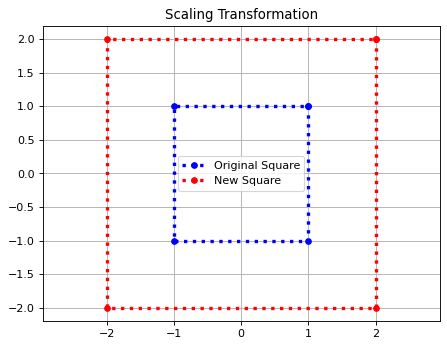

In [54]:
transformed_pts = np.dot(scale_matrix, original_pts_modified) # This will work now.

# Plot the original and transformed squares
plt.plot(original_pts[0, :], original_pts[1, :], 'b.:', label='Original Square', markersize = '10', linewidth = '3')
plt.plot(transformed_pts[0, :], transformed_pts[1, :], 'r.:', label='New Square', markersize = '10', linewidth = '3');

plt.axis('equal');
plt.title("Scaling Transformation")
plt.grid();
plt.legend();

**Rotation Transformation**

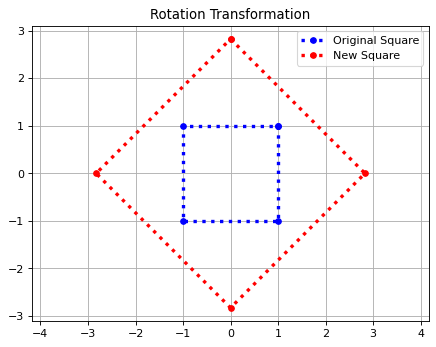

In [55]:
transformed_pts = np.dot(rotation_matrix, transformed_pts) # Notice, we're applying it to the output of the previous cell

# Plot the original and transformed squares
plt.plot(original_pts[0, :], original_pts[1, :], 'b.:', label='Original Square', markersize = '10', linewidth = '3')
plt.plot(transformed_pts[0, :], transformed_pts[1, :], 'r.:', label='New Square', markersize = '10', linewidth = '3');

plt.axis('equal');
plt.title("Rotation Transformation")
plt.grid();
plt.legend();

**Shearing Transformation**

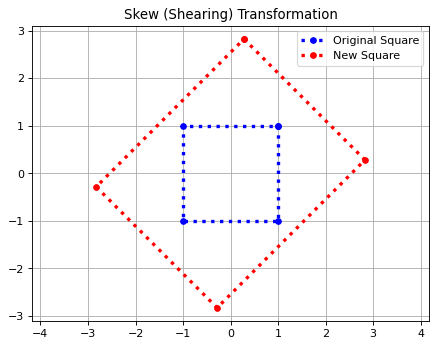

In [56]:
transformed_pts = np.dot(skew_matrix, transformed_pts)

# Plot the original and transformed squares
plt.plot(original_pts[0, :], original_pts[1, :], 'b.:', label='Original Square', markersize = '10', linewidth = '3')
plt.plot(transformed_pts[0, :], transformed_pts[1, :], 'r.:', label='New Square', markersize = '10', linewidth = '3');

plt.axis('equal');
plt.title("Skew (Shearing) Transformation")
plt.grid();
plt.legend();

**Apply the Transformations Simultaneously**

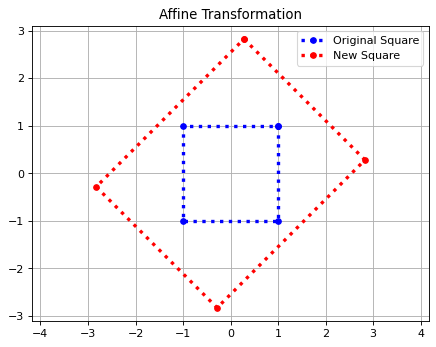

In [57]:
# Initialize the homography matrix
homography_matrix = np.zeros(shape = (3, 3))

# Take the dot product of the scale, rotation, and skew matrices. Unfortunately, the np.dot() method only takes two arguments at a time, so we need to go in steps.
homography_matrix = np.dot(skew_matrix, rotation_matrix);
homography_matrix = np.dot(homography_matrix, scale_matrix);

# Apply the affine transformation
transformed_pts = np.dot(homography_matrix, original_pts_modified)

# Plot the original and transformed squares
plt.plot(original_pts[0, :], original_pts[1, :], 'b.:', label='Original Square', markersize = '10', linewidth = '3')
plt.plot(transformed_pts[0, :], transformed_pts[1, :], 'r.:', label='New Square', markersize = '10', linewidth = '3');

plt.axis('equal');
plt.title("Affine Transformation")
plt.grid();
plt.legend();

Notice that the output is equivalent to applying the transformations sequentially.

It should also be noted that the order in which you take the dot product of the matrices will have an effect on the final response. Refer to the equation under "Closed Under Composition"

### **Example 2: Performing Image Transformations on an Image**

OpenCV provides two functions for image transformations given a transformation matrix (homography matrix). The difference between them depends on the size of the transformation matrix $T$ used.

`cv2.warpAffine(src, M, dsize)`
- **src**: The input image.
- **M**: The transformation matrix (2 x 3).
- **dsize**: The size of the output image (width, height).

`cv2.warpPerspective(src, M, dsize)`
- **src**: The input image.
- **M**: The transformation matrix (3 x 3).
- **dsize**: The size of the output image (width, height).

In [58]:
img_BGR = cv2.imread('data/images/butterfly.jpg')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

# height, width = img_RGB.shape[0], img_RGB.shape[1]
height, width = img_RGB.shape[:2]

**Scaling Transformation**

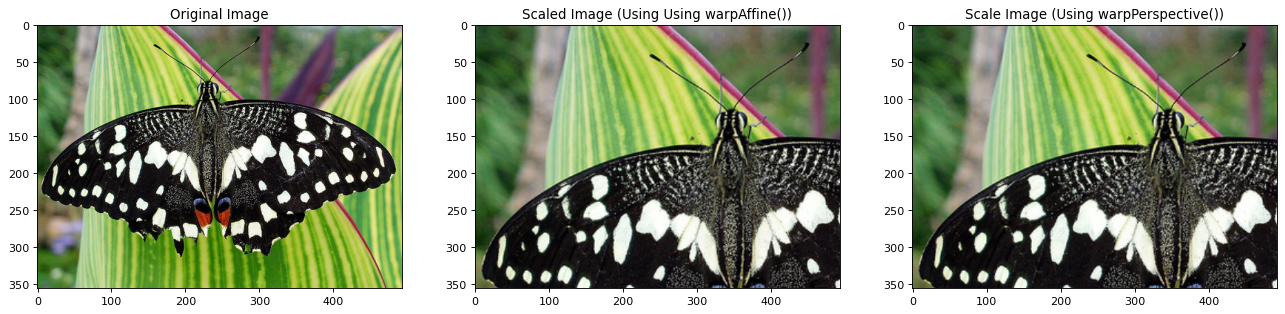

In [59]:
scale_factor_x = 1.5;
scale_factor_y = 1.5;

scale_matrix_23 = [
    [scale_factor_x, 0, 0],
    [0, scale_factor_y, 0],
]

scale_matrix_33 = [
    [scale_factor_x, 0, 0],
    [0, scale_factor_y, 0],
    [0, 0, 1]
]

scale_matrix_23 = np.array(scale_matrix_23)
scale_matrix_33 = np.array(scale_matrix_33)

img_scaled_1 = cv2.warpAffine(img_RGB, scale_matrix_23, (width, height))
img_scaled_2 = cv2.warpPerspective(img_RGB, scale_matrix_33, (width, height))

plt.figure(figsize = (20, 10))

plt.subplot(131)
plt.title("Original Image")
plt.imshow(img_RGB)

plt.subplot(132)
plt.title("Scaled Image (Using Using warpAffine())")
plt.imshow(img_scaled_1)

plt.subplot(133)
plt.title("Scale Image (Using warpPerspective())")
plt.imshow(img_scaled_2);

**Rotation Transformation**

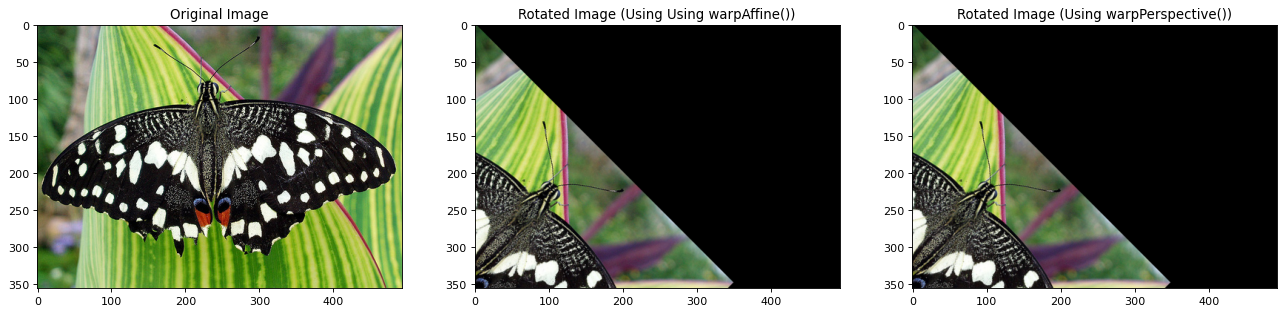

In [60]:
rotation_angle_degrees = 45
rotation_angle_radians =  np.radians(rotation_angle_degrees)

rotation_matrix_23 = [
    [np.cos(rotation_angle_radians), -np.sin(rotation_angle_radians), 0],
    [np.sin(rotation_angle_radians), np.cos(rotation_angle_radians), 0],
]

rotation_matrix_33 = [
    [np.cos(rotation_angle_radians), -np.sin(rotation_angle_radians), 0],
    [np.sin(rotation_angle_radians), np.cos(rotation_angle_radians), 0],
    [0, 0, 1]
]

rotation_matrix_23 = np.array(rotation_matrix_23)
rotation_matrix_33 = np.array(rotation_matrix_33)

img_rotated_1 = cv2.warpAffine(img_RGB, rotation_matrix_23, (width, height))
img_rotated_2 = cv2.warpPerspective(img_RGB, rotation_matrix_33, (width, height))

plt.figure(figsize = (20, 10))

plt.subplot(131)
plt.title("Original Image")
plt.imshow(img_RGB)

plt.subplot(132)
plt.title("Rotated Image (Using Using warpAffine())")
plt.imshow(img_rotated_1)

plt.subplot(133)
plt.title("Rotated Image (Using warpPerspective())")
plt.imshow(img_rotated_2);

**Skewing Transformation**

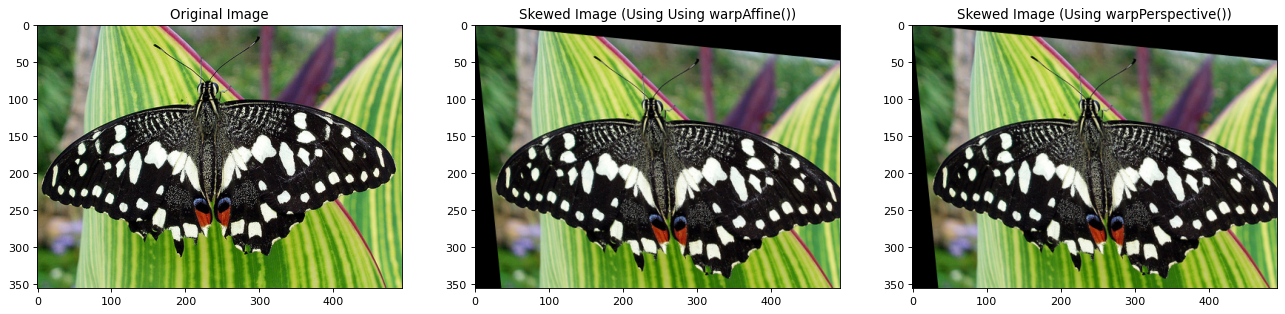

In [61]:
shear_factor_x = 0.10 # must be a float
shear_factor_y = 0.10

shear_matrix_23 = [
    [1, shear_factor_x, 0],
    [shear_factor_y, 1, 0],
]

shear_matrix_33 = [
    [1, shear_factor_x, 0],
    [shear_factor_y, 1, 0],
    [0, 0, 1]
]

shear_matrix_23 = np.array(shear_matrix_23)
shear_matrix_33 = np.array(shear_matrix_33)

img_skewed_1 = cv2.warpAffine(img_RGB, shear_matrix_23, (width, height))
img_skewed_2 = cv2.warpPerspective(img_RGB, shear_matrix_33, (width, height))

plt.figure(figsize = (20, 10))

plt.subplot(131)
plt.title("Original Image")
plt.imshow(img_RGB)

plt.subplot(132)
plt.title("Skewed Image (Using Using warpAffine())")
plt.imshow(img_skewed_1)

plt.subplot(133)
plt.title("Skewed Image (Using warpPerspective())")
plt.imshow(img_skewed_2);

**Translation Matrix**

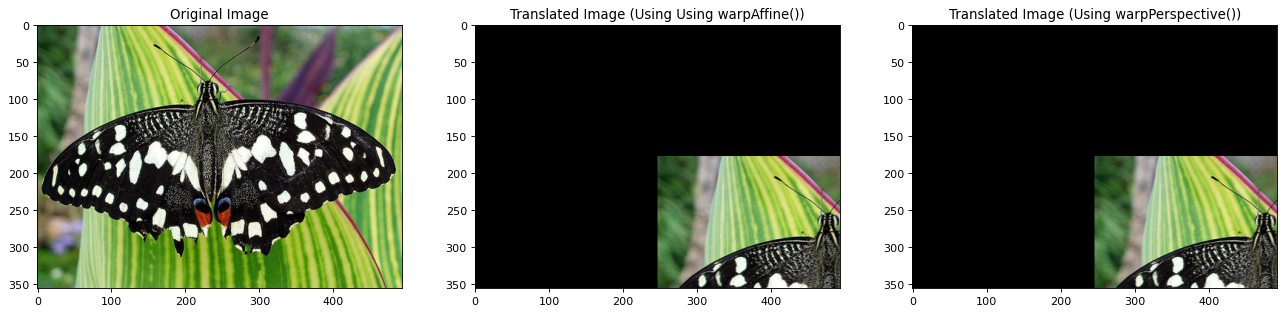

In [62]:
translation_x = width / 2; # pushed half way to the right
translation_y = height / 2; # pushed half way down

translation_matrix_23 = [
    [1, 0, translation_x],
    [0, 1, translation_y],
]

translation_matrix_33 = [
    [1, 0, translation_x],
    [0, 1, translation_y],
    [0, 0, 1]
]

translation_matrix_23 = np.array(translation_matrix_23)
translation_matrix_33 = np.array(translation_matrix_33)

img_translated_1 = cv2.warpAffine(img_RGB, translation_matrix_23, (width, height))
img_translated_2 = cv2.warpPerspective(img_RGB, translation_matrix_33, (width, height))

plt.figure(figsize = (20, 10))

plt.subplot(131)
plt.title("Original Image")
plt.imshow(img_RGB)

plt.subplot(132)
plt.title("Translated Image (Using Using warpAffine())")
plt.imshow(img_translated_1)

plt.subplot(133)
plt.title("Translated Image (Using warpPerspective())")
plt.imshow(img_translated_2);

### **Example 3: Mirror an Image**

Until this point, we have a source image and we apply a well-defined homography matrix to yield an output image. In the present and following examples, we'll determine how to obtain the homography matrix given the source image and a **desired** destination image.

Recall that the homography matrix of any affine transformation is delineated by 6 constants with a $2 \times 3$ matrix. For this reason, our approach will be to select three points in the input image and map them to three corresponding points in the output image. This method establishes a system of six equations with six unknowns, that can be easily be solved for.

For instance, if you want to take the mirror of an image, you can define the 3 points as (you may choose any 3).

![Image](https://i0.wp.com/theailearner.com/wp-content/uploads/2020/11/affine12.jpg?w=1061&ssl=1)

Once the transformation matrix is calculated, we apply the affine transformation to the entire input image to get the final transformed image. Let’s see how to do this using OpenCV-Python.

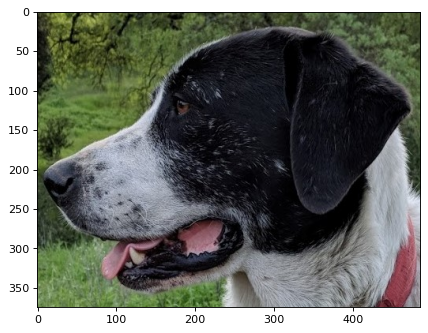

In [63]:
img_BGR = cv2.imread('data/images/dog-face.jpg')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

plt.imshow(img_RGB);

The next task is to define three pairs of corresponding points. We'll use the points as shown in the explanation diagram above.

In [64]:
height, width = img_RGB.shape[:2] # Remember that the number of rows is the height and the # of columns in the width

input_pts = [
    [0, 0],
    [width - 1, 0],
    [0, height - 1]
]

output_pts = [
    [width - 1, 0],
    [0, 0],
    [width - 1, height - 1]
]

input_pts = np.array(input_pts, np.float32)
output_pts = np.array(output_pts, np.float32)

We'll now make use of the function `cv2.getAffineTransform()` to compute the homography matrix that maps the input points to the output points.

`cv2.getAffineTransform(src, dst)`
- **src**: A set of 3 source points.
- **dst**: A set of 3 corresponding destination points.

In [65]:
homography_matrix = cv2.getAffineTransform(input_pts, output_pts);

Having computed the homography matrix, we can now apply that transformation matrix to the entire image.

In [66]:
result = cv2.warpAffine(img_RGB, homography_matrix, dsize = (width, height))

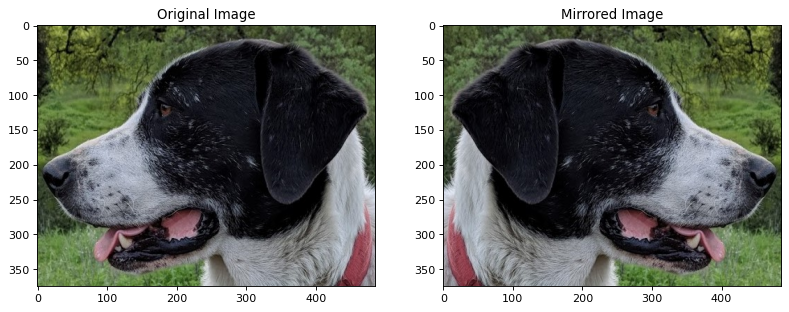

In [67]:
plt.figure(figsize = (12, 8))

plt.subplot(121)
plt.imshow(img_RGB)
plt.title("Original Image")

plt.subplot(122)
plt.imshow(result)
plt.title("Mirrored Image")

plt.show()

How about we concatenate the two images instead of displaying them separately?

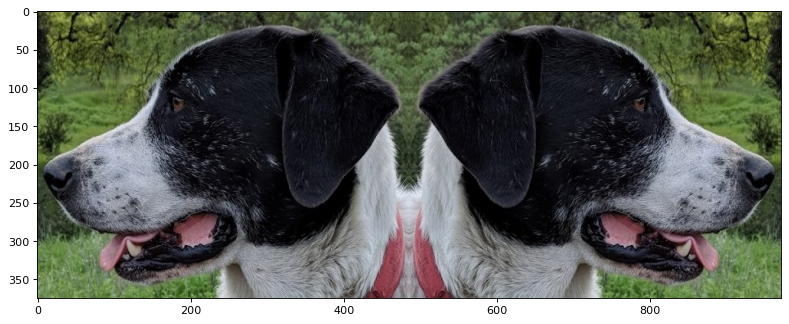

In [68]:
# A myriad of ways to do this

## Horizontally
output_img = np.concatenate((img_RGB, result), axis = 1)
# output_img = np.hstack((img_RGB, result))
# output_img = cv2.hconcat((img_RGB, result))

## Vertically
# output_img = np.concatenate((img_RGB, result), axis = 0)
# output_img = np.vstack((img_RGB, result))
# output_img = cv2.vconcat((img_RGB, result))

plt.figure(figsize = (12, 8))
plt.imshow(output_img);

### **Example 4: Change the Perspective of an Image**

Since a Perspective Transformation Matrix is defined by 8 constants, we must select 4 points in the input image and map these 4 points to the desired locations in the output image according to the use case (This way, we'll have 8 equations and 8 unknowns that can be easily solved for).

Once the transformation matrix is calculated, then we apply the perspective transformation to the entire input image to get the final transformed image.

For instance, let's try to change the viewpoint of the below image so that we're looking head on.

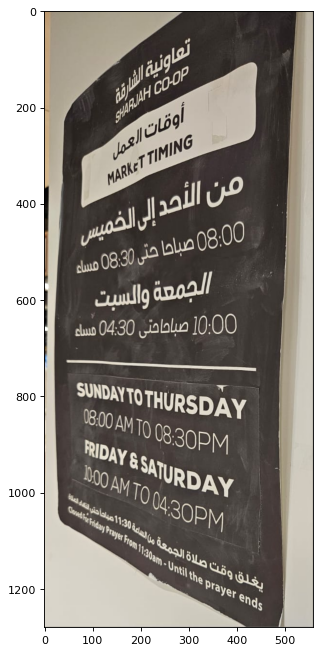

In [69]:
img_BGR = cv2.imread('data/images/supermarket-timing.jpeg')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (25, 10))
plt.imshow(img_RGB);

The basic idea is as follows:

![](https://i0.wp.com/theailearner.com/wp-content/uploads/2020/11/perspective2-1.jpg?w=880&ssl=1)

The first task is to obtain the input points. We can eyeball the coordinates of the corners or run matplotlib intereactively. The latter is demonstrated below:

In [70]:
%matplotlib qt5

plt.figure(figsize = (20, 10))
plt.imshow(img_RGB);

# move around the cursor. You'll see the (x,y) coordinates on a panel bar

In [71]:
top_left = [66, 303] 
top_right = [459, 95]
bottom_right = [444, 1120]
bottom_left = [58, 973]

The next task is to determine the width and height of the resulting image.

In [72]:
width_top = 459 - 66
width_bottom = 444 - 58

height_left = 973 - 303
height_right = 973 - 95

width = max(width_top, width_top)
height = max(height_left, height_right)

Now, we can do the mapping, according to the diagram above.

In [73]:
input_pts = [
    top_left,
    top_right, 
    bottom_right,
    bottom_left
]

output_pts = [
    [0, 0],
    [width - 1, 0],
    [width - 1, height - 1],
    [0, height - 1]
]

input_pts = np.array(input_pts, np.float32)
output_pts = np.array(output_pts, np.float32)

Find the perspective transformatin matrix using `cv2.getPerspectiveTransform()`

`cv2.getPerspectiveTransform(src, dst)`
- **src**: A set of 4 source points.
- **dst**: A set of 4 corresponding destination points.

In [74]:
homography_matrix = cv2.getPerspectiveTransform(input_pts, output_pts);

Now apply that transformation to the entire image.

In [75]:
result = cv2.warpPerspective(img_RGB, homography_matrix, dsize = (width, height))

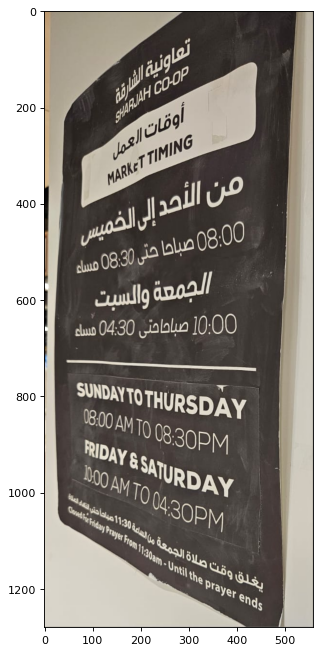

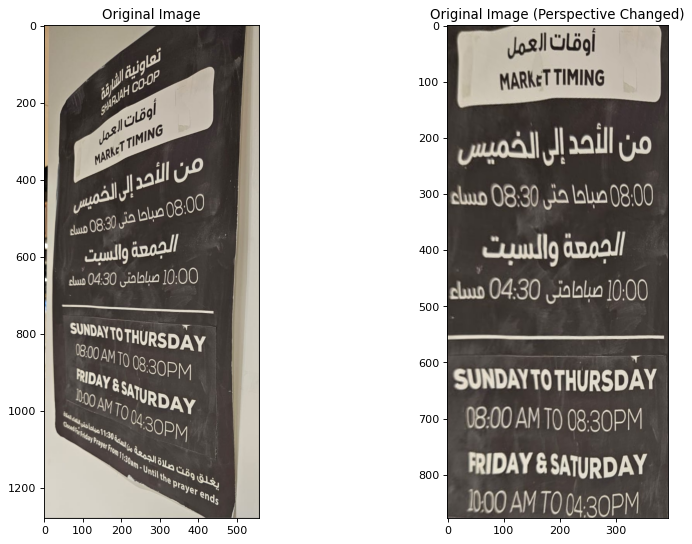

In [76]:
%matplotlib inline

plt.figure(figsize = (12, 8))

plt.subplot(121)
plt.imshow(img_RGB)
plt.title("Original Image")

plt.subplot(122)
plt.imshow(result)
plt.title("Original Image (Perspective Changed)")

plt.show()

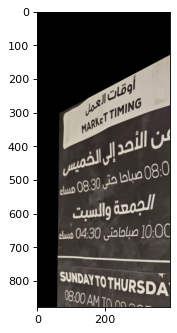

In [77]:
homography_matrix = cv2.getPerspectiveTransform(output_pts, input_pts);
result = cv2.warpPerspective(result, homography_matrix, dsize = (width, height))

plt.imshow(result)